In [4]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
from keras.models import load_model,save_model,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 25s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 83s 51ms/step - loss: 1.3906 - accuracy: 0.5043
Epoch 2/50
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0397 - accuracy: 0.6345
Epoch 3/50
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9011 - accuracy: 0.6842
Epoch 4/50
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8001 - accuracy: 0.7201
Epoch 5/50
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7202 - accuracy: 0.7478
Epoch 6/50
1563/1563 [==============================] - 78s 50ms/step - loss: 0.6529 - accuracy: 0.7702
Epoch 7/50
1563/1563 [==============================] - 80s 51ms/step - loss: 0.5820 - accuracy: 0.7964
Epoch 8/50
1563/1563 [==============================] - 78s 50ms/step - loss: 0.5203 - accuracy: 0.8167
Epoch 9/50
1563/1563 [==============================] - 82s 53ms/step - loss: 0.4682 - accuracy: 0.8340
Epoch 10/50
1563/1563 [==============================] - 78s 50m

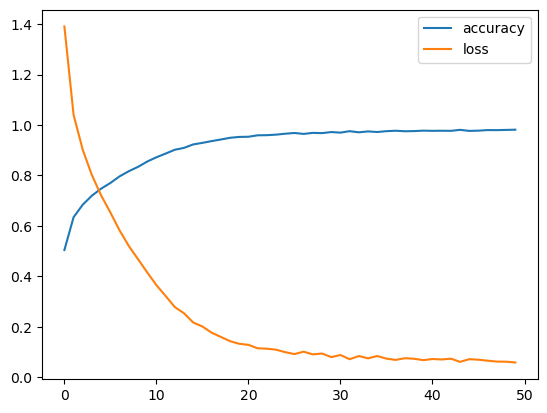

In [12]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(x_test[0].reshape(1,32,32,3))

1/1 [==============================] - 1s 1s/step


In [14]:
y_pred_label = np.argmax(y_pred)
y_pred_label

3

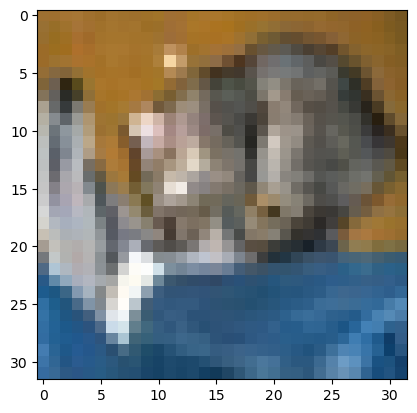

In [15]:
plt.imshow(x_test[0])